In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kd = pd.read_csv("/content/drive/MyDrive/Indian_Kids_Screen_Time.csv")
kd.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
kd.tail()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


The dataset highlights that a large majority of children exceed healthy screen time limits, with smartphones being the dominant device. This overuse correlates strongly with health issues like poor sleep and eye strain. Recreational use outweighs educational usage, raising concerns about digital well-being, especially in urban populations.

In [ ]:
kd.shape

(9712, 8)

In [ ]:
kd.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [ ]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [ ]:
kd.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Dataset Description

Rows & Columns: 9,712 rows × 8 columns

Demographics: Age (8–18 years), Gender (Male/Female), Urban vs. Rural residence

Screen Time: Avg. daily usage ranges from 0 to 13.9 hours, mean ≈ 4.35 hours/day

Devices: Smartphone, TV, Laptop, Tablet

Other Features:

Whether the child exceeded recommended screen time

Ratio of educational to recreational screen use

Reported health impacts

In [ ]:
kd.duplicated().sum()

np.int64(44)

In [ ]:
kd.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [ ]:
device_count= kd['Primary_Device'].value_counts()
print(device_count)

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64


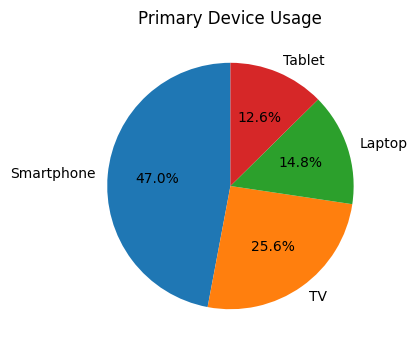

In [ ]:
plt.figure(figsize=(4,4))
device_count.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Primary Device Usage")
plt.ylabel("")
plt.show()

Most of children spending their time on smartphones, which is about 50%.

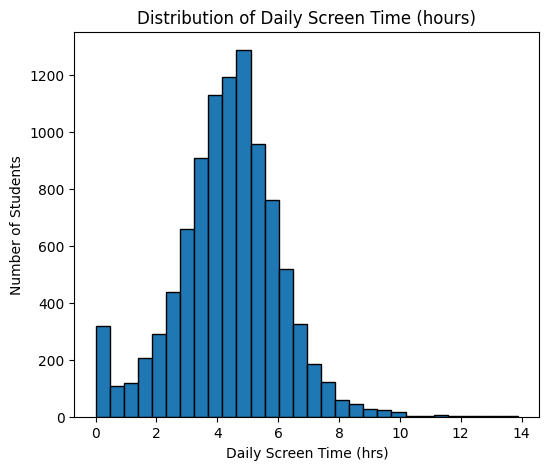

In [ ]:
# Average screen time distribution of children
plt.figure(figsize=(6,5))
plt.hist(kd["Avg_Daily_Screen_Time_hr"], bins=30, edgecolor="black")
plt.title("Distribution of Daily Screen Time (hours)")
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
health = kd['Health_Impacts'].value_counts()
print(health)

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


In [ ]:
kd['Health_Impacts'].describe()

,Health_Impacts
count,6494
unique,15
top,Poor Sleep
freq,2268


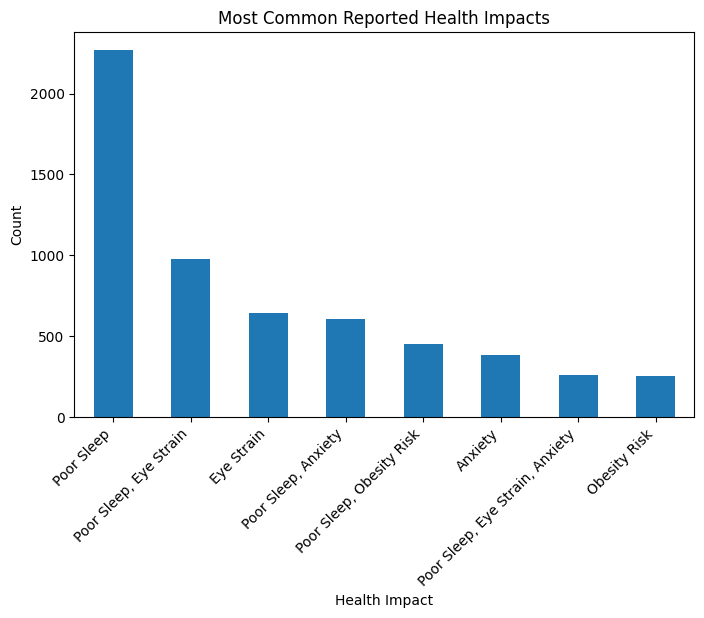

In [ ]:
plt.figure(figsize=(8,5))
health.head(8).plot(kind="bar")
plt.title("Most Common Reported Health Impacts")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
from __future__ import generator_stop
gen_count = kd['Gender'].value_counts()
print(pd.DataFrame(gen_count))

        count
Gender       
Male     4942
Female   4770


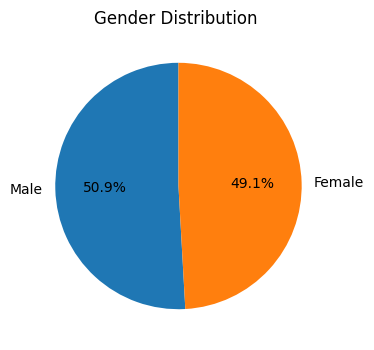

In [ ]:
plt.figure(figsize=(4,4))
gen_count.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution ")
plt.ylabel("")
plt.show()

In [ ]:
kd['Age'].describe()

,Age
count,9712.000000
mean,12.979201
std,3.162437
min,8.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,18.000000


In [ ]:
age = kd.loc[kd["Age"]==18]
age_max = age.value_counts()
print(age_max)

Age  Gender  Avg_Daily_Screen_Time_hr  Primary_Device  Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  Health_Impacts                   Urban_or_Rural
18   Male    5.98                      Smartphone      True                        0.49                               Poor Sleep, Eye Strain           Urban             2
             4.13                      Smartphone      True                        0.33                               Poor Sleep                       Rural             1
             4.14                      Smartphone      True                        0.37                               Anxiety                          Urban             1
             4.15                      Smartphone      True                        0.38                               Poor Sleep                       Urban             1
             4.17                      Smartphone      True                        0.48                               Eye Strain                      

In [ ]:
urban_rural = kd['Urban_or_Rural'].value_counts()
print(urban_rural)

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64


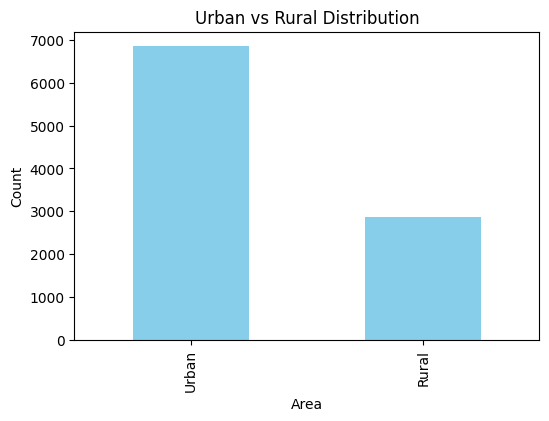

In [ ]:
plt.figure(figsize=(6,4))
urban_rural.plot(kind="bar", color="skyblue")
plt.title("Urban vs Rural Distribution")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

In [ ]:
exceeded_limit_counts = kd['Exceeded_Recommended_Limit'].value_counts()

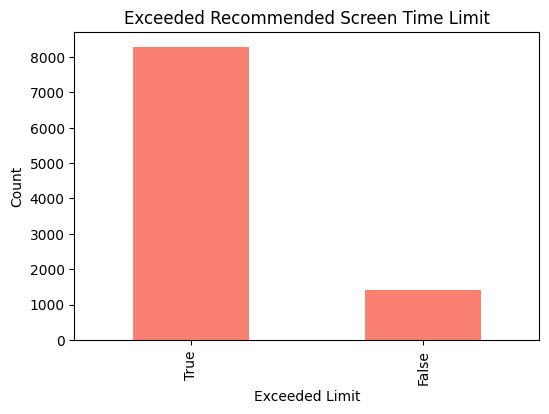

In [ ]:
plt.figure(figsize=(6,4))
exceeded_limit_counts.plot(kind="bar", color="salmon")
plt.title("Exceeded Recommended Screen Time Limit")
plt.xlabel("Exceeded Limit")
plt.ylabel("Count")
plt.show()

This graph shows lots of kids cross exceed limit

In [ ]:
kd.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
age_group = kd.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()

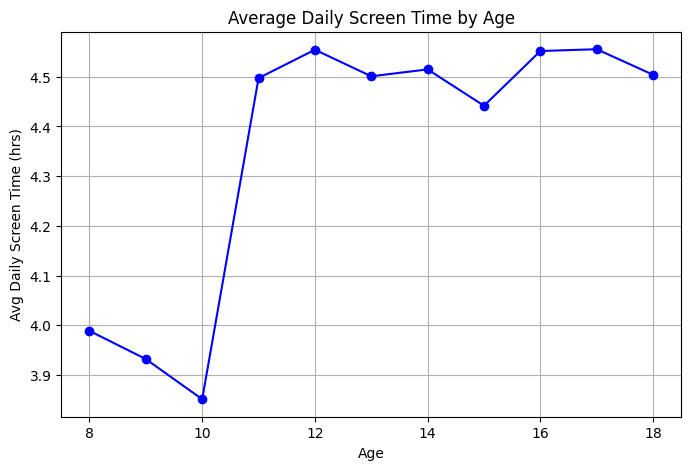

In [ ]:
plt.figure(figsize=(8,5))
age_group.plot(kind="line", marker="o",color = "blue")
plt.title("Average Daily Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.grid(True)
plt.show()

In [ ]:
kd.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
gen_group = kd.groupby('Gender')["Health_Impacts"]

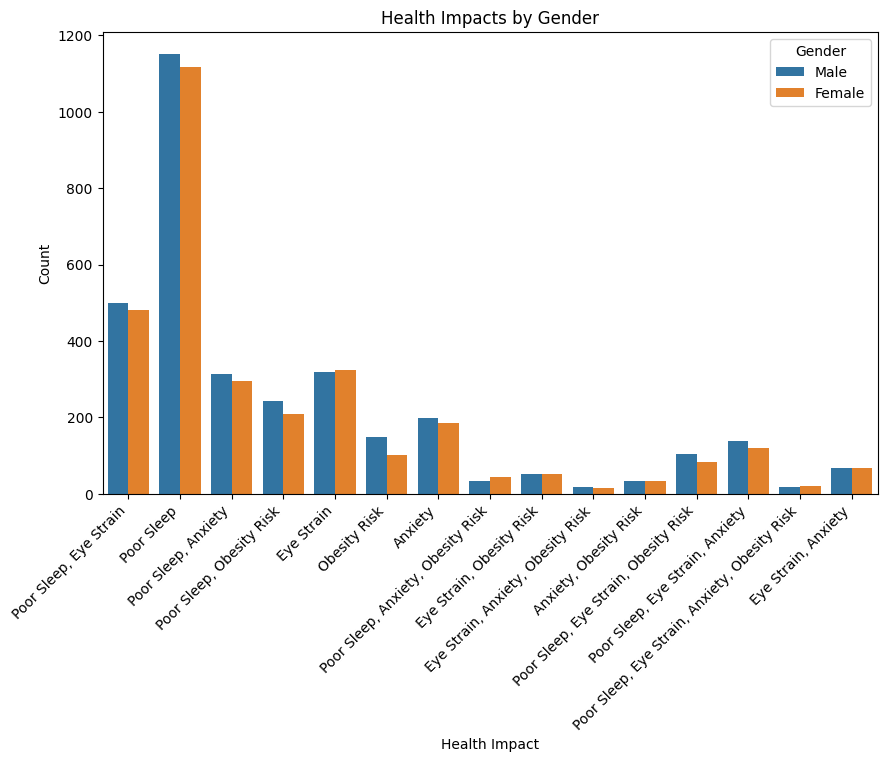

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=kd, x="Health_Impacts", hue="Gender")
plt.title("Health Impacts by Gender")
plt.xlabel("Health Impact")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.show()

✅ Accuracy: 1.0

Confusion Matrix:
 [[ 282    0]
 [   0 1661]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       282
        True       1.00      1.00      1.00      1661

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



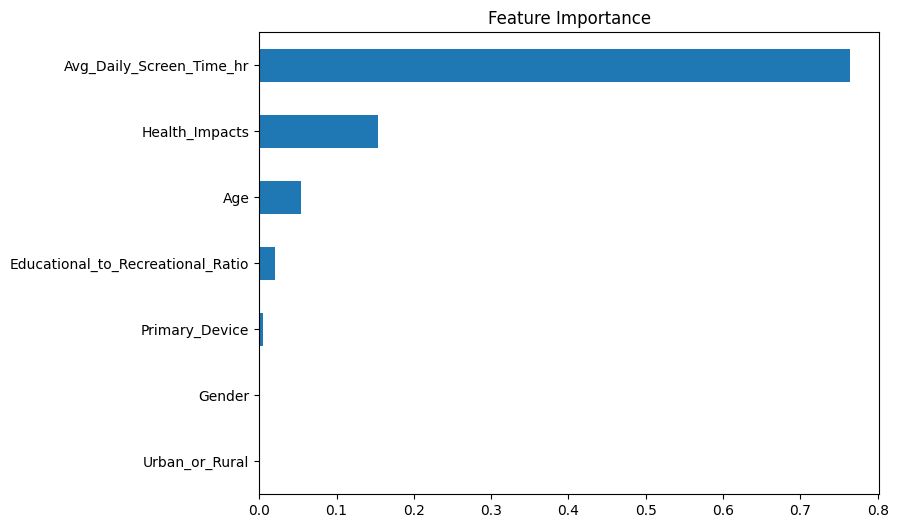

In [ ]:
# ML pipeline for predicting "Exceeded_Recommended_Limit"

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
file_path = "/content/drive/MyDrive/Indian_Kids_Screen_Time.csv"
df = pd.read_csv(file_path)

# -------------------------
# 1. Data Preprocessing
# -------------------------

# Encode categorical variables
label_cols = ["Gender", "Primary_Device", "Health_Impacts", "Urban_or_Rural"]
df_encoded = df.copy()

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features (X) and target (y)
X = df_encoded.drop("Exceeded_Recommended_Limit", axis=1)
y = df_encoded["Exceeded_Recommended_Limit"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]] = scaler.fit_transform(
    X_train[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]]
)
X_test[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]] = scaler.transform(
    X_test[["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]]
)
# -------------------------
# 2. Model Training
# -------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 3. Evaluation
# -------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------
# 4. Feature Importance
# -------------------------
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

Here’s a short summary of what the ML code does:

1. Loads & preprocesses data – encodes categorical features, scales numerical ones.

2. Splits data – 80% training, 20% testing.

3. Trains a Random Forest model – predicts if a student exceeds recommended screen time.

4. Evaluates model – prints accuracy, confusion matrix, and classification report.

5. Explains results – plots feature importance to show which factors influence predictions most.

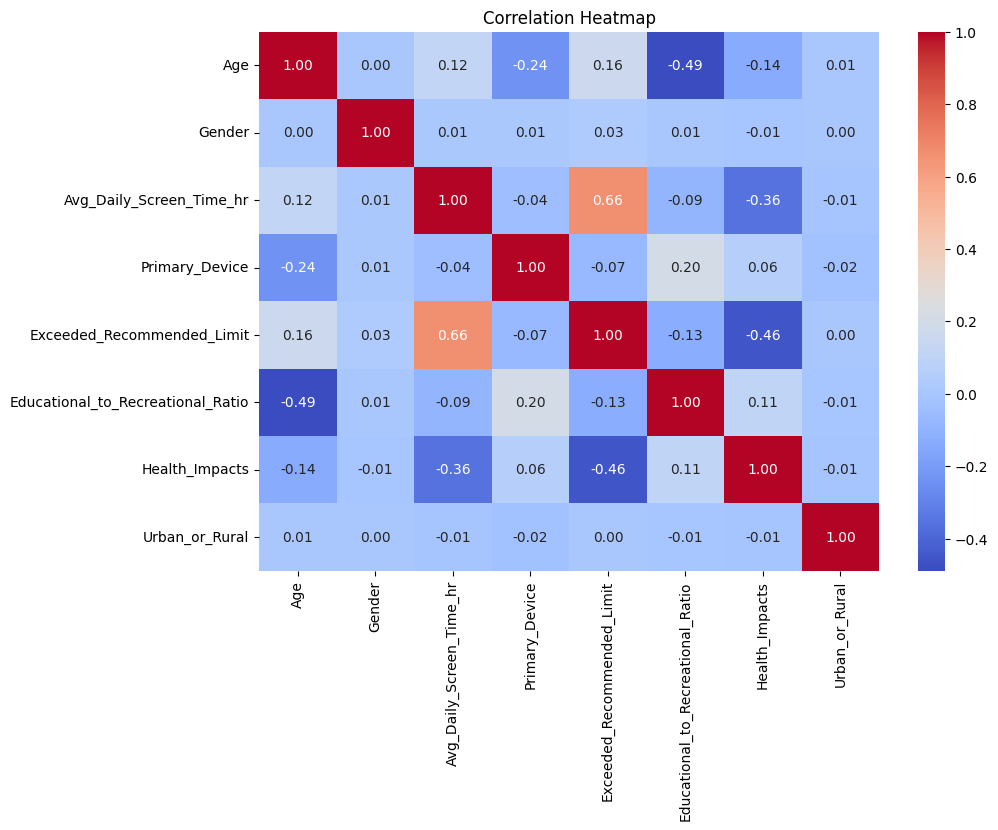

In [ ]:
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Here’s the correlation heatmap ✅

It shows how features (Age, Screen Time, Device, Gender, Health Impacts, etc.) relate to each other and to the target Exceeded_Recommended_Limit.